In [47]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [62]:
print(os.listdir('hists'))
for filename in os.listdir('hists'):
    with gzip.open('hists/'+filename) as fin:
        hists = pickle.load(fin)
    
print(hists)

['ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz', 'ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz', 'ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz', 'ZJetsToNuNu_HT-1200To2500_13TeV-madgraph.pkl.gz', 'ZJetsToNuNu_HT-400To600_13TeV-madgraph.pkl.gz', 'ZJetsToNuNu_HT-800To1200_13TeV-madgraph.pkl.gz', 'ZJetsToNuNu_HT-200To400_13TeV-madgraph.pkl.gz', 'DYJetsToLL_M-50_HT-100to200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.pkl.gz']
{'recoil': <Hist (dataset,recoil) instance at 0x1271dc940>}


In [63]:


process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "recoil")
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Z+jets"] = ("ZJets*",slice(250, None))
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

<IPython.core.display.Javascript object>


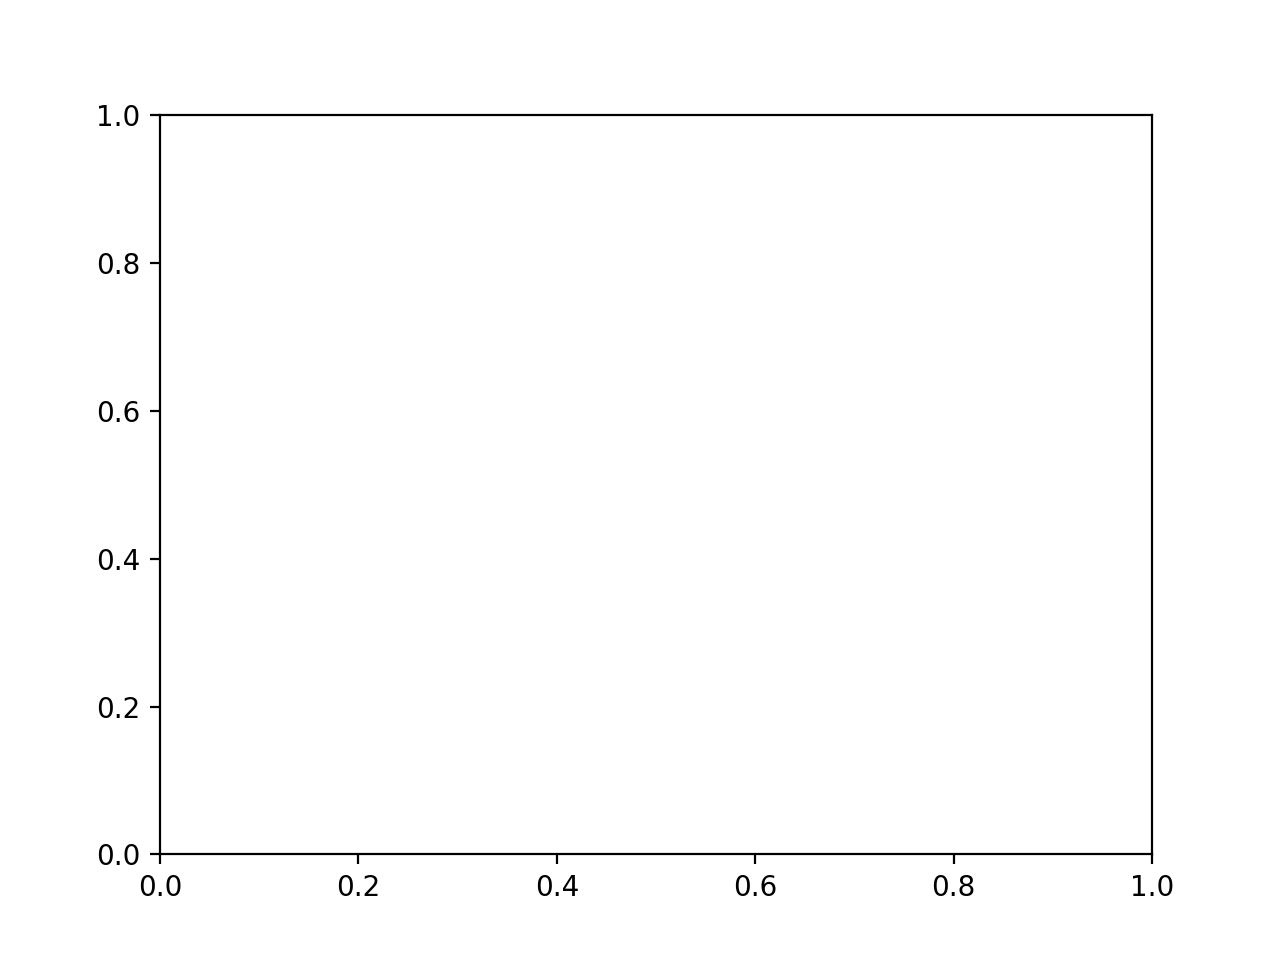

IndexError: tuple index out of range

In [55]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
fig, ax, _ = plot.plot1d(hists['recoil'], overlay="process", stack=True, fill_opts=fill_opts)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
ax.set_ylim(.0,None)

In [10]:
nbins = sum(sum(arr.size for arr in h._sumw.values()) for h in hists.values())
nfilled = sum(sum(np.sum(arr>0) for arr in h._sumw.values()) for h in hists.values())
print("Now %.1fM bins" % (nbins/1e6, ))
print("Nonzero bins: %.1f%%" % (100*nfilled/nbins, ))

Now 0.0M bins
Nonzero bins: 4.2%
